## GQA Question Engine

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def load_scene_graph(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

scene_graph_file = 'data/sceneGraphs/train_sceneGraphs.json'
scene_graph_data = load_scene_graph(scene_graph_file)

{
    "1665235": {
        "attributes": [],
        "h": 194,
        "name": "ground",
        "relations": [
            {
                "name": "to the right of",
                "object": "2223553"
            },
            {
                "name": "to the right of",
                "object": "1855767"
            },
            {
                "name": "to the right of",
                "object": "2608901"
            },
            {
                "name": "to the right of",
                "object": "2444445"
            }
        ],
        "w": 257,
        "x": 144,
        "y": 179
    },
    "1734279": {
        "attributes": [],
        "h": 48,
        "name": "menu",
        "relations": [
            {
                "name": "to the left of",
                "object": "1941208"
            },
            {
                "name": "to the right of",
                "object": "2223553"
            },
            {
                "name": "to the right of",
       

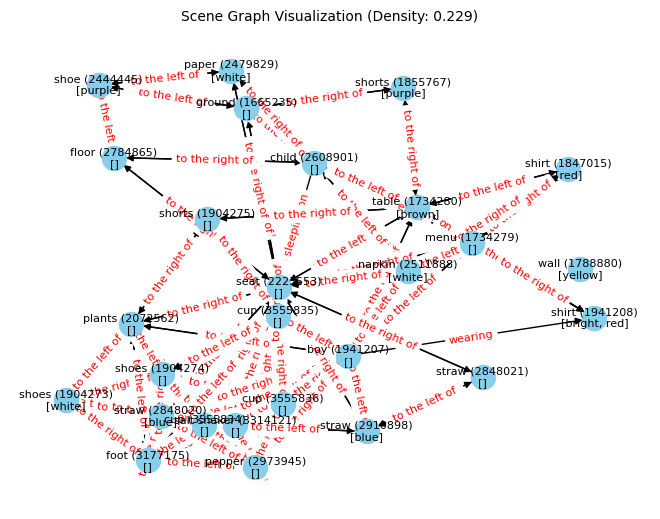

In [2]:
# Example image ID
# 2338159
# 2382734
# 2357213

image_id = "2357213"

if image_id in scene_graph_data:
    image_data = scene_graph_data[image_id]["objects"]
else:
    raise ValueError(f"Image ID {image_id} not found in the scene graph data")

print(json.dumps(image_data, sort_keys=True, indent=4))

# Create a graph
G = nx.DiGraph()

for obj_id, obj_data in image_data.items():
    obj_name = f'{obj_data["name"]} ({obj_id})'
    attributes = ', '.join(obj_data["attributes"]) if "attributes" in obj_data else ""
    label = f'{obj_name}\n[{attributes}]'
    
    # Add object node with attributes
    G.add_node(obj_id, label=label)
    
    # Add edges for relationships
    if "relations" in obj_data:
        for relation in obj_data["relations"]:
            target_obj = relation["object"]
            relation_name = relation["name"]
            G.add_edge(obj_id, target_obj, label=relation_name)

# Get graph density and node count to adjust layout and size
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
graph_density = nx.density(G)  # Density: edges / possible edges

# Dynamic scaling based on the number of nodes and edges
scale_factor = max(1, num_nodes / 30)  # Adjust based on node count
node_size = max(200, 300 / scale_factor)  # Dynamic node size
font_size = max(5, 8 / scale_factor)     # Dynamic font size
k_value = max(0.5, 1 / scale_factor)    # Dynamic spacing between nodes

# Define position layout (spring_layout) with dynamic k based on density
pos = nx.spring_layout(G, k=k_value)

# Draw nodes with dynamic size and labels with dynamic font size
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), 
        node_size=node_size, node_color='skyblue', font_size=font_size, font_weight='light')

# Draw edges with smaller labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=font_size)

# Display the plot with adjusted title size
plt.title(f"Scene Graph Visualization (Density: {graph_density:.3f})", fontsize=10)
plt.show()


In [36]:
import random
import csv

question_templates = {
    "attribute-based": [
        "What {attribute} is the {object_name}?",
        "What {attribute} does the {object_name} have?",
        "What is the {attribute} of the {object_name}?",
    ],
    "relation-based": [
        "What object {is_verb} {relation_name} to the {object_name}?",
        "Which object does the {object_name} {relation_name}?",
        "What is {relation_name} to the {object_name}?",
        "Where is the {object_name} in relation to the {target_obj_name}?",
    ]
}

# Generate questions from objects and their attributes
def generate_object_attribute_questions(objects):
    questions = []
    for obj_id, obj_data in objects.items():
        obj_name = obj_data['name']
        attributes = obj_data.get('attributes', [])
        
        # For each attribute, generate a question
        for attribute in attributes:
            template = random.choice(question_templates["attribute-based"])
            question = template.format(attribute=attribute, object_name=obj_name)
            questions.append(question)
    
    return questions

# Generate questions from object relations
def generate_relation_questions(objects):
    questions = []
    for obj_id, obj_data in objects.items():
        obj_name = obj_data['name']
        
        # For each relation, generate a question
        for relation in obj_data.get('relations', []):
            relation_name = relation['name']
            target_obj_id = relation['object']
            target_obj_name = objects[target_obj_id]['name']
            
            template = random.choice(question_templates["relation-based"])
            question = template.format(relation_name=relation_name, object_name=obj_name, target_obj_name=target_obj_name, is_verb="is")
            questions.append(question)
    
    return questions

def generate_questions(image_id, scene_graph_data):
    if image_id not in scene_graph_data:
        raise ValueError(f"Image ID {image_id} not found in the scene graph data")

    image_data = scene_graph_data[image_id]["objects"]
    
    attribute_questions = generate_object_attribute_questions(image_data)
    relation_questions = generate_relation_questions(image_data)
    
    all_questions = attribute_questions + relation_questions
    return all_questions


# Function to save questions to CSV
def save_questions_to_csv(scene_graph_data, num_images, file_path):
    questions_list = []
    
    for i, image_id in enumerate(scene_graph_data.keys()):
        if i >= num_images:
            break
        
        questions = generate_questions(image_id, scene_graph_data)
        
        for question in questions:
            questions_list.append([image_id, question])
    
    with open(file_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['ImageId', 'Question'])
        csvwriter.writerows(questions_list)

    print(f"Questions for {num_images} images saved to {file_path}")

file_path = 'generated/generated_questions.csv'
num_images = 3

save_questions_to_csv(scene_graph_data, num_images, file_path)

Questions for 2 images saved to generated/generated_questions.csv


In [37]:
import random
import csv

question_templates = {
    "attribute-based": [
        "What {attribute} is the {object_name}?",
        "What {attribute} does the {object_name} have?",
        "What is the {attribute} of the {object_name}?",
    ],
    "relation-based": [
        "What object {is_verb} {relation_name} to the {object_name}?",
        "Which object does the {object_name} {relation_name}?",
        "What is {relation_name} to the {object_name}?",
        "Where is the {object_name} in relation to the {target_obj_name}?",
    ]
}

# Generate questions from objects and their attributes
def generate_object_attribute_questions(objects):
    questions_data = []
    for obj_id, obj_data in objects.items():
        obj_name = obj_data['name']
        attributes = obj_data.get('attributes', [])
        
        for attribute in attributes:
            template = random.choice(question_templates["attribute-based"])
            question = template.format(attribute=attribute, object_name=obj_name)
            questions_data.append({
                'image_id': obj_id, 'object': obj_name, 'attribute': attribute, 
                'relation': '', 'target': '', 'question': question
            })
    
    return questions_data

# Generate questions from object relations
def generate_relation_questions(objects):
    questions_data = []
    for obj_id, obj_data in objects.items():
        obj_name = obj_data['name']
        
        for relation in obj_data.get('relations', []):
            relation_name = relation['name']
            target_obj_id = relation['object']
            target_obj_name = objects[target_obj_id]['name']
            
            template = random.choice(question_templates["relation-based"])
            question = template.format(relation_name=relation_name, object_name=obj_name, target_obj_name=target_obj_name, is_verb="is")
            questions_data.append({
                'image_id': obj_id, 'object': obj_name, 'attribute': '', 
                'relation': relation_name, 'target': target_obj_name, 'question': question
            })
    
    return questions_data

def generate_questions(image_id, scene_graph_data):
    if image_id not in scene_graph_data:
        raise ValueError(f"Image ID {image_id} not found in the scene graph data")

    image_data = scene_graph_data[image_id]["objects"]
    
    attribute_questions_data = generate_object_attribute_questions(image_data)
    relation_questions_data = generate_relation_questions(image_data)
    
    all_questions_data = attribute_questions_data + relation_questions_data
    return all_questions_data

def save_questions_to_csv(scene_graph_data, num_images, file_path):
    questions_data_list = []
    
    for i, image_id in enumerate(scene_graph_data.keys()):
        if i >= num_images:
            break
        
        questions_data = generate_questions(image_id, scene_graph_data)
        
        questions_data_list.extend(questions_data)
    
    # Write all data to the CSV file
    with open(file_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['ImageId', 'Object', 'Attribute', 'Relation', 'Target', 'Question'])
        for data in questions_data_list:
            csvwriter.writerow([data['image_id'], data['object'], data['attribute'], data['relation'], data['target'], data['question']])

    print(f"Questions and related data for {num_images} images saved to {file_path}")

file_path = 'generated/generated_questions_with_data.csv'
num_images = 3

save_questions_to_csv(scene_graph_data, num_images, file_path)


Questions and related data for 3 images saved to generated/generated_questions_with_data.csv


Hi, I generated a question from scene graph data. They are still wrong. Can you help correct it?

please return it as a CSV file with two columns. The first column is the wrong old one. The second column is the newly corrected ones.

Here is the wrong question CSV file

